# 🏠 Competição de Machine Learning: House Prices
## Housing Prices Competition for Kaggle Learn Users

**Objetivo:** Prever o preço de venda de casas com base em suas características

Neste notebook, vocês aprenderão a:
1. 📊 Realizar análise exploratória de dados
2. 🔧 Tratar e preparar dados para modelos de ML
3. 🤖 Aplicar modelos de Machine Learning
4. 📈 Avaliar e melhorar os resultados

---

## 📋 Contexto da Competição

O dataset contém informações sobre casas vendidas em Ames, Iowa. Cada casa possui 79 características diferentes (features) que descrevem aspectos como:
- Tamanho e dimensões
- Qualidade de construção
- Ano de construção
- Localização
- Características especiais (piscina, garagem, etc.)

**Nosso desafio:** Criar um modelo que preveja o preço de venda (`SalePrice`) baseado nessas características!

---
## 🤖 Aprendizado Supervisionado vs Não Supervisionado

### 📊 **Aprendizado Supervisionado** (o que faremos aqui!)

**Definição:** O algoritmo aprende a partir de **dados rotulados** - ou seja, temos exemplos com as respostas corretas.

**Nosso Caso:**
- **Dados de Entrada (X):** Características das casas (tamanho, localização, qualidade, etc.)
- **Rótulo/Target (y):** Preço de venda conhecido (SalePrice)
- **Objetivo:** Aprender a relação entre X e y para prever preços de casas novas

**Tipos de Problemas Supervisionados:**
- **Regressão** ← **Nosso caso!** (prever valores contínuos - preços)
- **Classificação** (prever categorias - ex: spam ou não spam)

**Exemplos do Dia a Dia:**
- 🏠 Prever preços de imóveis
- 📧 Filtros de spam (classificar e-mails)
- 🎬 Sistemas de recomendação (Netflix, Spotify)
- 🏥 Diagnóstico médico (classificar doenças)

---

### 🔍 **Aprendizado Não Supervisionado**

**Definição:** O algoritmo trabalha com **dados não rotulados** - não temos as respostas, queremos descobrir padrões ocultos.

**Características:**
- **Sem rótulos:** Apenas dados de entrada (X), sem target (y)
- **Objetivo:** Encontrar estruturas, agrupamentos ou padrões nos dados

**Tipos de Problemas Não Supervisionados:**
- **Clustering (Agrupamento):** Agrupar dados similares
  - Ex: Segmentar clientes por comportamento de compra
  - Ex: Agrupar notícias por tópicos semelhantes
  
- **Redução de Dimensionalidade:** Simplificar dados complexos
  - Ex: PCA para visualização de dados multidimensionais
  
- **Detecção de Anomalias:** Identificar padrões incomuns
  - Ex: Detectar fraudes em transações bancárias

**Exemplos do Dia a Dia:**
- 🛒 Segmentação de clientes para marketing
- 🔐 Detecção de fraudes e atividades suspeitas
- 📰 Organização automática de artigos por temas
- 🧬 Análise de padrões genéticos

---

### 📋 **Comparação Rápida**

| Aspecto | Supervisionado | Não Supervisionado |
|---------|---------------|-------------------|
| **Dados** | Rotulados (com resposta) | Não rotulados (sem resposta) |
| **Objetivo** | Prever output | Encontrar padrões |
| **Exemplo** | Prever preço de casa | Agrupar clientes similares |
| **Algoritmos** | Regressão Linear, Random Forest, Neural Networks | K-Means, DBSCAN, PCA |

---

**💡 Neste Notebook:** Vamos focar em **Aprendizado Supervisionado** do tipo **Regressão**, onde temos os preços reais das casas no conjunto de treino e queremos prever os preços de casas novas no conjunto de teste!


## 📚 1. Importação de Bibliotecas

Primeiro, vamos importar as bibliotecas necessárias:
- **pandas**: para manipulação de dados
- **numpy**: para operações numéricas
- **matplotlib/seaborn**: para visualização de dados
- **sklearn**: para modelos de Machine Learning

In [1]:
# Manipulação de dados
import pandas as pd
import numpy as np

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

# Ignorar warnings
import warnings
warnings.filterwarnings('ignore')

# Configurações de visualização
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

# Configurações do pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("✅ Bibliotecas importadas com sucesso!")

✅ Bibliotecas importadas com sucesso!


## 📂 2. Carregamento dos Dados

Vamos carregar os dados de treino e teste. 
- **train.csv**: dados com o preço de venda (usaremos para treinar nosso modelo)
- **test.csv**: dados sem o preço (nosso objetivo é prever esses preços)

In [2]:
# Carregar os dados
train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')

print(f"📊 Dados de treino: {train_data.shape[0]} linhas e {train_data.shape[1]} colunas")
print(f"📊 Dados de teste: {test_data.shape[0]} linhas e {test_data.shape[1]} colunas")
print("\n✅ Dados carregados com sucesso!")

📊 Dados de treino: 1460 linhas e 81 colunas
📊 Dados de teste: 1459 linhas e 80 colunas

✅ Dados carregados com sucesso!


---
# 🔍 PARTE 1: ANÁLISE EXPLORATÓRIA DE DADOS (EDA)

A análise exploratória é fundamental para:
- Entender a estrutura dos dados
- Identificar padrões e relações
- Detectar valores faltantes ou anômalos
- Guiar decisões de pré-processamento

## 3.1 Primeiras Visualizações dos Dados

Vamos examinar as primeiras linhas e obter informações gerais sobre o dataset.

In [3]:
# Visualizar as primeiras linhas
print("🔍 Primeiras 5 linhas do dataset de treino:\n")
train_data.head()

🔍 Primeiras 5 linhas do dataset de treino:



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Informações gerais sobre os dados
print("📋 Informações sobre os dados:\n")
train_data.info()

📋 Informações sobre os dados:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 n

In [5]:
# Estatísticas descritivas das variáveis numéricas
print("📊 Estatísticas descritivas:\n")
train_data.describe()

📊 Estatísticas descritivas:



,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## 3.2 Análise da Variável Target (SalePrice)

O **SalePrice** é nossa variável alvo - o que queremos prever. Vamos entender sua distribuição.

💰 Análise do Preço de Venda (SalePrice):

Preço médio: $180,921.20
Preço mediano: $163,000.00
Preço mínimo: $34,900.00
Preço máximo: $755,000.00
Desvio padrão: $79,442.50


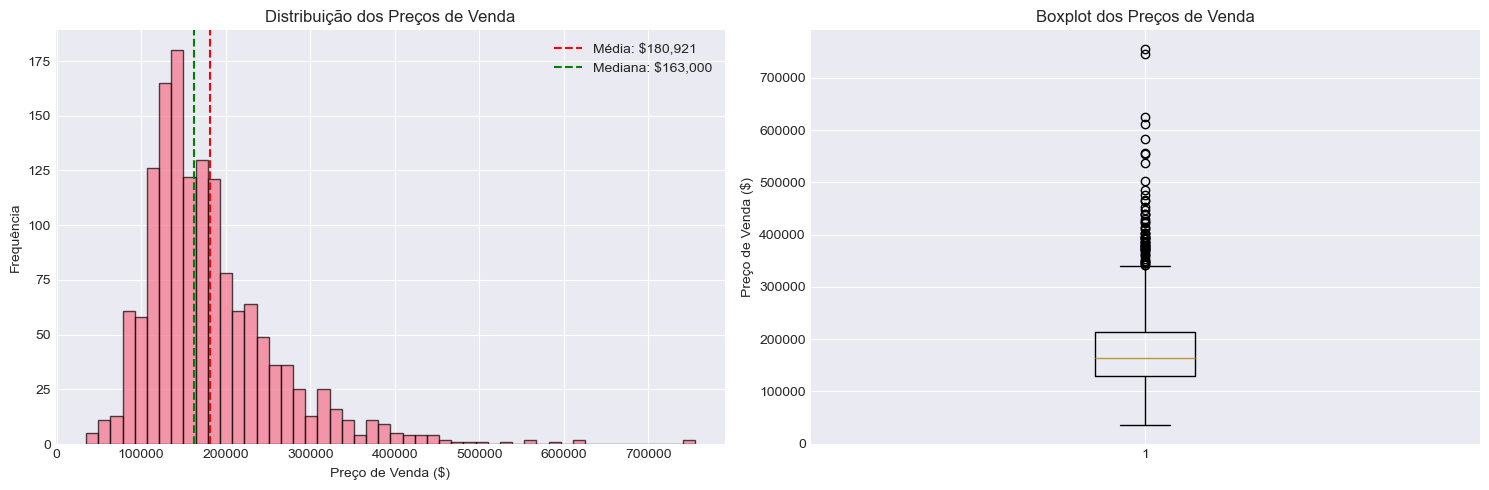

In [6]:
# Estatísticas do SalePrice
print("💰 Análise do Preço de Venda (SalePrice):\n")
print(f"Preço médio: ${train_data['SalePrice'].mean():,.2f}")
print(f"Preço mediano: ${train_data['SalePrice'].median():,.2f}")
print(f"Preço mínimo: ${train_data['SalePrice'].min():,.2f}")
print(f"Preço máximo: ${train_data['SalePrice'].max():,.2f}")
print(f"Desvio padrão: ${train_data['SalePrice'].std():,.2f}")

# Visualização da distribuição
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histograma
axes[0].hist(train_data['SalePrice'], bins=50, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Preço de Venda ($)')
axes[0].set_ylabel('Frequência')
axes[0].set_title('Distribuição dos Preços de Venda')
axes[0].axvline(train_data['SalePrice'].mean(), color='red', linestyle='--', label=f'Média: ${train_data["SalePrice"].mean():,.0f}')
axes[0].axvline(train_data['SalePrice'].median(), color='green', linestyle='--', label=f'Mediana: ${train_data["SalePrice"].median():,.0f}')
axes[0].legend()

# Boxplot
axes[1].boxplot(train_data['SalePrice'], vert=True)
axes[1].set_ylabel('Preço de Venda ($)')
axes[1].set_title('Boxplot dos Preços de Venda')

plt.tight_layout()
plt.show()

## 3.3 Análise de Valores Faltantes

Valores faltantes (missing values) são comuns em datasets reais. Precisamos identificá-los para decidir como tratá-los.

🔍 Colunas com valores faltantes: 19

              Total  Percentual
PoolQC         1453   99.520548
MiscFeature    1406   96.301370
Alley          1369   93.767123
Fence          1179   80.753425
MasVnrType      872   59.726027
FireplaceQu     690   47.260274
LotFrontage     259   17.739726
GarageType       81    5.547945
GarageYrBlt      81    5.547945
GarageFinish     81    5.547945
GarageQual       81    5.547945
GarageCond       81    5.547945
BsmtExposure     38    2.602740
BsmtFinType2     38    2.602740
BsmtQual         37    2.534247
BsmtCond         37    2.534247
BsmtFinType1     37    2.534247
MasVnrArea        8    0.547945
Electrical        1    0.068493


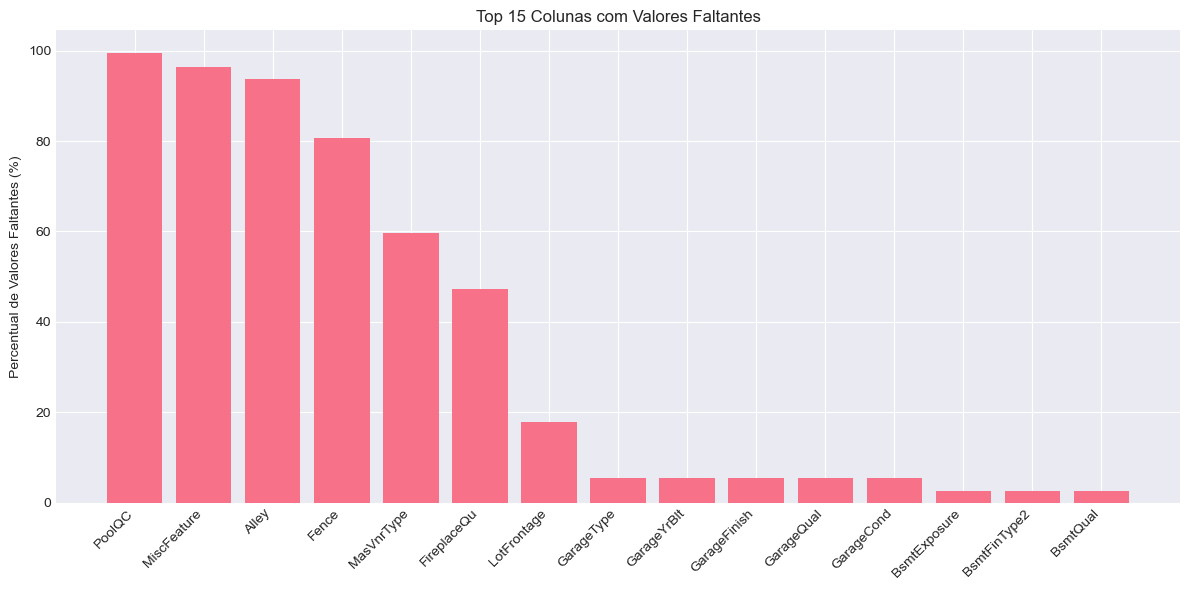

In [7]:
# Calcular valores faltantes
missing_train = train_data.isnull().sum()
missing_train_percent = 100 * missing_train / len(train_data)

# Criar DataFrame com valores faltantes
missing_data = pd.DataFrame({
    'Total': missing_train,
    'Percentual': missing_train_percent
})

# Filtrar apenas colunas com valores faltantes
missing_data = missing_data[missing_data['Total'] > 0].sort_values('Total', ascending=False)

print(f"🔍 Colunas com valores faltantes: {len(missing_data)}\n")
print(missing_data.head(20))

# Visualização
plt.figure(figsize=(12, 6))
plt.bar(range(len(missing_data.head(15))), missing_data['Percentual'].head(15))
plt.xticks(range(len(missing_data.head(15))), missing_data.head(15).index, rotation=45, ha='right')
plt.ylabel('Percentual de Valores Faltantes (%)')
plt.title('Top 15 Colunas com Valores Faltantes')
plt.tight_layout()
plt.show()


In [8]:
# remover colunas com muitos valores faltantes, com mais de 15% de valores faltantes
cols_to_drop = missing_data[missing_data['Percentual'] > 15].index
print(f"\n🗑️ Removendo {len(cols_to_drop)} colunas: {list(cols_to_drop)}")
train_data.drop(columns=cols_to_drop, inplace=True)

# IMPORTANTE: Remover as mesmas colunas do conjunto de teste
test_data.drop(columns=cols_to_drop, inplace=True, errors='ignore')
print(f"✅ Colunas removidas de ambos os conjuntos (treino e teste)")


🗑️ Removendo 7 colunas: ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu', 'LotFrontage']
✅ Colunas removidas de ambos os conjuntos (treino e teste)


## 3.4 Correlação com o Preço de Venda

Vamos identificar quais variáveis numéricas têm maior correlação com o preço. Isso nos ajuda a entender quais características são mais importantes.

🔗 Top 15 variáveis mais correlacionadas com SalePrice:

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
Name: SalePrice, dtype: float64


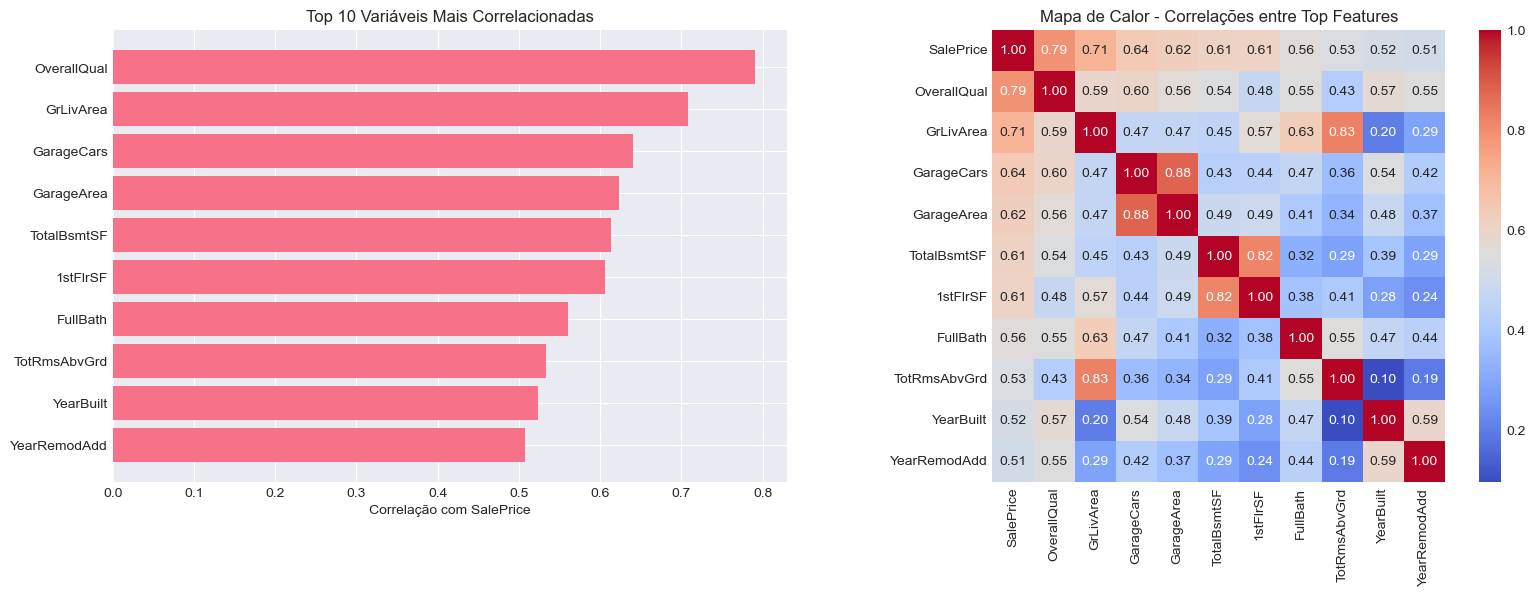


📝 Observação:
 OverallQual (Qualidade geral do material e do acabamento)
 GrLivArea (Área habitável acima do solo)
 GarageCars (Tamanho da garagem em capacidade para carros)
 são as variáveis com maior correlação positiva com o preço!


In [9]:
# Selecionar apenas colunas numéricas
numeric_features = train_data.select_dtypes(include=[np.number]).columns.tolist()

# Calcular correlação com SalePrice
correlations = train_data[numeric_features].corr()['SalePrice'].sort_values(ascending=False)

print("🔗 Top 15 variáveis mais correlacionadas com SalePrice:\n")
print(correlations.head(15))

# Visualização
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico de barras
top_corr = correlations.head(11)[1:]  # Excluir SalePrice (correlação 1.0 consigo mesmo)
axes[0].barh(range(len(top_corr)), top_corr.values)
axes[0].set_yticks(range(len(top_corr)))
axes[0].set_yticklabels(top_corr.index)
axes[0].set_xlabel('Correlação com SalePrice')
axes[0].set_title('Top 10 Variáveis Mais Correlacionadas')
axes[0].invert_yaxis()

# Heatmap das principais correlações
top_features = correlations.head(11).index
correlation_matrix = train_data[top_features].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', ax=axes[1], square=True)
axes[1].set_title('Mapa de Calor - Correlações entre Top Features')

plt.tight_layout()
plt.show()

print("\n📝 Observação:\n OverallQual (Qualidade geral do material e do acabamento)\n GrLivArea (Área habitável acima do solo)\n GarageCars (Tamanho da garagem em capacidade para carros)\n são as variáveis com maior correlação positiva com o preço!")

## 3.5 Relações entre Variáveis Importantes e o Preço

Vamos visualizar scatter plots para entender melhor a relação entre as principais features e o preço.

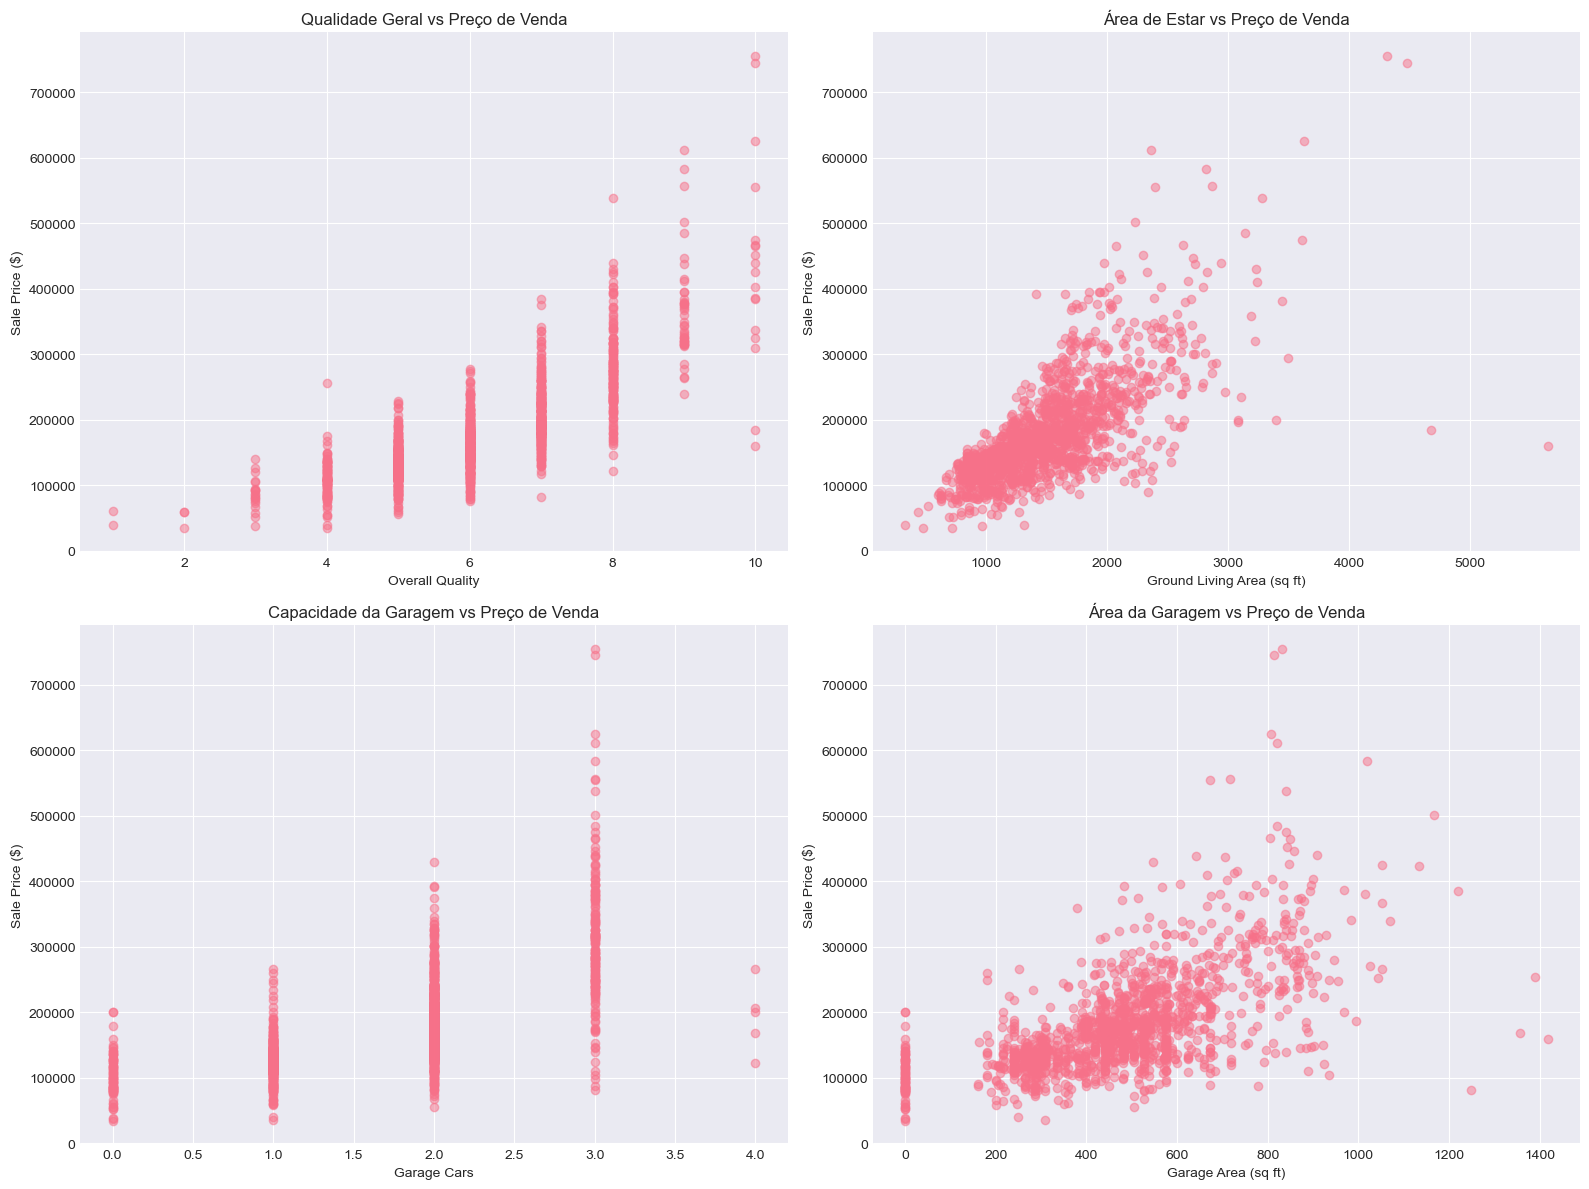

📝 Observação: Existe clara relação positiva entre essas variáveis e o preço - quanto maior, mais caro!


In [10]:
# Scatter plots das principais features
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# OverallQual vs SalePrice
axes[0, 0].scatter(train_data['OverallQual'], train_data['SalePrice'], alpha=0.5)
axes[0, 0].set_xlabel('Overall Quality')
axes[0, 0].set_ylabel('Sale Price ($)')
axes[0, 0].set_title('Qualidade Geral vs Preço de Venda')

# GrLivArea vs SalePrice
axes[0, 1].scatter(train_data['GrLivArea'], train_data['SalePrice'], alpha=0.5)
axes[0, 1].set_xlabel('Ground Living Area (sq ft)')
axes[0, 1].set_ylabel('Sale Price ($)')
axes[0, 1].set_title('Área de Estar vs Preço de Venda')

# GarageCars vs SalePrice
axes[1, 0].scatter(train_data['GarageCars'], train_data['SalePrice'], alpha=0.5)
axes[1, 0].set_xlabel('Garage Cars')
axes[1, 0].set_ylabel('Sale Price ($)')
axes[1, 0].set_title('Capacidade da Garagem vs Preço de Venda')

# GarageArea vs SalePrice
axes[1, 1].scatter(train_data['GarageArea'], train_data['SalePrice'], alpha=0.5)
axes[1, 1].set_xlabel('Garage Area (sq ft)')
axes[1, 1].set_ylabel('Sale Price ($)')
axes[1, 1].set_title('Área da Garagem vs Preço de Venda')

plt.tight_layout()
plt.show()

print("📝 Observação: Existe clara relação positiva entre essas variáveis e o preço - quanto maior, mais caro!")

---
# 🔧 PARTE 2: TRATAMENTO E PREPARAÇÃO DOS DADOS

Agora que entendemos os dados, vamos prepará-los para os modelos de ML. Isso inclui:
- Tratar valores faltantes
- Codificar variáveis categóricas
- Selecionar features relevantes
- Criar conjuntos de treino e validação

## 4.1 Estratégia de Tratamento de Dados

Para começar, vamos usar uma abordagem simples mas eficaz:
1. **Separar variável target (y) das features (X)**
2. **Focar em variáveis numéricas** (mais simples para o primeiro modelo)
3. **Tratar valores faltantes** preenchendo com a mediana
4. **Manter IDs separados** para submissão final

In [11]:
# Separar variável target
y = train_data['SalePrice'].copy()

# Remover SalePrice e Id dos dados de treino
X = train_data.drop(['SalePrice', 'Id'], axis=1)

# Guardar Id do conjunto de teste para submissão
test_ids = test_data['Id'].copy()
X_test_final = test_data.drop(['Id'], axis=1)

print("✅ Separação realizada:")
print(f"   X (features de treino): {X.shape}")
print(f"   y (target): {y.shape}")
print(f"   X_test (features de teste): {X_test_final.shape}")

✅ Separação realizada:
   X (features de treino): (1460, 72)
   y (target): (1460,)
   X_test (features de teste): (1459, 72)


## 4.2 Seleção de Features Numéricas

Vamos começar usando apenas variáveis numéricas, pois são mais simples de trabalhar. Variáveis categóricas serão tratadas em modelos mais avançados.

In [12]:
# Selecionar apenas colunas numéricas
X_numeric = X.select_dtypes(include=[np.number])
X_test_numeric = X_test_final.select_dtypes(include=[np.number])

print(f"🔢 Variáveis numéricas selecionadas: {X_numeric.shape[1]} de {X.shape[1]} colunas totais")
print(f"\nPrimeiras variáveis numéricas:\n{X_numeric.columns.tolist()[:10]}")
print(f"...")

🔢 Variáveis numéricas selecionadas: 35 de 72 colunas totais

Primeiras variáveis numéricas:
['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF']
...


## 4.3 Tratamento de Valores Faltantes

**Por que é importante?** A maioria dos algoritmos de ML não consegue trabalhar com valores faltantes (NaN).

**Nossa estratégia:** Preencher valores faltantes com a **mediana** de cada coluna (valor central, menos sensível a outliers que a média).

In [13]:
# Verificar valores faltantes antes
print("❌ Valores faltantes ANTES do tratamento:")
print(f"   Treino: {X_numeric.isnull().sum().sum()} valores faltantes")
print(f"   Teste: {X_test_numeric.isnull().sum().sum()} valores faltantes")

# Preencher valores faltantes com a mediana
# Importante: calcular mediana no treino e aplicar no teste para evitar data leakage
X_numeric_filled = X_numeric.fillna(X_numeric.median())

# Para o teste, precisamos garantir que usamos as medianas do treino
# E tratar casos onde colunas podem não existir em ambos os conjuntos
medians_train = X_numeric.median()
X_test_numeric_filled = X_test_numeric.copy()

# Preencher coluna por coluna usando a mediana do treino
for col in X_test_numeric_filled.columns:
    if col in medians_train.index:
        # Usar mediana do treino
        X_test_numeric_filled[col].fillna(medians_train[col], inplace=True)
    else:
        # Se a coluna não existe no treino, usar mediana do próprio teste
        X_test_numeric_filled[col].fillna(X_test_numeric_filled[col].median(), inplace=True)

# Verificar se ainda há valores faltantes
print("\n✅ Valores faltantes DEPOIS do tratamento:")
print(f"   Treino: {X_numeric_filled.isnull().sum().sum()} valores faltantes")
print(f"   Teste: {X_test_numeric_filled.isnull().sum().sum()} valores faltantes")

# Mostrar detalhes se ainda houver valores faltantes no teste
if X_test_numeric_filled.isnull().sum().sum() > 0:
    print("\n⚠️ Colunas com valores faltantes restantes no teste:")
    cols_with_nulls = X_test_numeric_filled.isnull().sum()
    print(cols_with_nulls[cols_with_nulls > 0])

print("\n💡 Observação: Usamos a mediana do conjunto de treino para preencher ambos os conjuntos!")


❌ Valores faltantes ANTES do tratamento:
   Treino: 89 valores faltantes
   Teste: 103 valores faltantes

✅ Valores faltantes DEPOIS do tratamento:
   Treino: 0 valores faltantes
   Teste: 0 valores faltantes

💡 Observação: Usamos a mediana do conjunto de treino para preencher ambos os conjuntos!


## 4.4 Tratamento de Variáveis Categóricas

**Por que é importante?** Modelos de ML só trabalham com números. Variáveis categóricas (texto) precisam ser convertidas.

**Nossa estratégia:** 
- Usar **One-Hot Encoding** para transformar categorias em colunas binárias (0 ou 1)
- Garantir que treino e teste tenham as mesmas colunas


In [14]:
# Identificar e tratar variáveis categóricas
print("🏷️ Tratamento de Variáveis Categóricas\n")

# Selecionar variáveis categóricas
X_categorical = X.select_dtypes(include=['object'])
X_test_categorical = X_test_final.select_dtypes(include=['object'])

print(f"📊 Variáveis categóricas encontradas: {X_categorical.shape[1]}")
print(f"Exemplos: {X_categorical.columns.tolist()[:5]}")

# Preencher valores faltantes em categóricas com 'Missing'
X_categorical_filled = X_categorical.fillna('Missing')
X_test_categorical_filled = X_test_categorical.fillna('Missing')

# Aplicar One-Hot Encoding
# IMPORTANTE: usar drop_first=True para evitar multicolinearidade
print("\n🔄 Aplicando One-Hot Encoding...")
X_categorical_encoded = pd.get_dummies(X_categorical_filled, drop_first=True)
X_test_categorical_encoded = pd.get_dummies(X_test_categorical_filled, drop_first=True)

# Garantir que treino e teste tenham as mesmas colunas
# Alinhar as colunas (adicionar colunas faltantes com zeros)
missing_cols_in_test = set(X_categorical_encoded.columns) - set(X_test_categorical_encoded.columns)
missing_cols_in_train = set(X_test_categorical_encoded.columns) - set(X_categorical_encoded.columns)

for col in missing_cols_in_test:
    X_test_categorical_encoded[col] = 0
    
for col in missing_cols_in_train:
    X_categorical_encoded[col] = 0

# Reordenar colunas para ter a mesma ordem
X_test_categorical_encoded = X_test_categorical_encoded[X_categorical_encoded.columns]

print(f"✅ Encoding completo!")
print(f"   Treino: {X_categorical_encoded.shape[1]} features categóricas codificadas")
print(f"   Teste: {X_test_categorical_encoded.shape[1]} features categóricas codificadas")

# Combinar features numéricas e categóricas
X_combined = pd.concat([X_numeric_filled, X_categorical_encoded], axis=1)
X_test_combined = pd.concat([X_test_numeric_filled, X_test_categorical_encoded], axis=1)

print(f"\n🎯 Dataset final combinado:")
print(f"   Treino: {X_combined.shape[0]} linhas × {X_combined.shape[1]} features")
print(f"   ({X_numeric_filled.shape[1]} numéricas + {X_categorical_encoded.shape[1]} categóricas)")
print(f"   Teste: {X_test_combined.shape[0]} linhas × {X_test_combined.shape[1]} features")

print("\n💡 Observação: One-Hot Encoding transforma cada categoria em uma coluna binária (0 ou 1).")
print("   Por exemplo, 'Neighborhood' com 3 valores vira 2 colunas novas (drop_first=True).")

🏷️ Tratamento de Variáveis Categóricas

📊 Variáveis categóricas encontradas: 37
Exemplos: ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities']

🔄 Aplicando One-Hot Encoding...
✅ Encoding completo!
   Treino: 210 features categóricas codificadas
   Teste: 210 features categóricas codificadas

🎯 Dataset final combinado:
   Treino: 1460 linhas × 245 features
   (35 numéricas + 210 categóricas)
   Teste: 1459 linhas × 245 features

💡 Observação: One-Hot Encoding transforma cada categoria em uma coluna binária (0 ou 1).
   Por exemplo, 'Neighborhood' com 3 valores vira 2 colunas novas (drop_first=True).


## 4.5 Divisão Treino-Validação

**Por que dividir?** Precisamos de um conjunto separado para avaliar nosso modelo de forma imparcial.

- **Conjunto de Treino**: usado para treinar o modelo (80% dos dados)
- **Conjunto de Validação**: usado para avaliar a performance (20% dos dados)

Isso nos ajuda a detectar **overfitting** (quando o modelo decora os dados ao invés de aprender padrões).

In [15]:
# Dividir dados em treino e validação (80-20)
X_train, X_val, y_train, y_val = train_test_split(
    X_combined, 
    y, 
    test_size=0.2, 
    random_state=42  # Para reprodutibilidade
)

print("✅ Dados divididos:")
print(f"   Treino: {X_train.shape[0]} amostras ({X_train.shape[0]/len(X_combined)*100:.1f}%)")
print(f"   Validação: {X_val.shape[0]} amostras ({X_val.shape[0]/len(X_combined)*100:.1f}%)")
print(f"   Features: {X_train.shape[1]} variáveis ({X_numeric_filled.shape[1]} numéricas + {X_categorical_encoded.shape[1]} categóricas)")

✅ Dados divididos:
   Treino: 1168 amostras (80.0%)
   Validação: 292 amostras (20.0%)
   Features: 245 variáveis (35 numéricas + 210 categóricas)


---
# 🤖 PARTE 3: APLICAÇÃO DE MODELOS DE MACHINE LEARNING

Agora vamos treinar e avaliar diferentes modelos para prever os preços das casas!

## Métricas de Avaliação

Para este problema de **regressão**, usaremos as seguintes métricas de avaliação para entender a performance do nosso modelo:

- **MAE (Mean Absolute Error - Erro Absoluto Médio)**: 
    - Mede a média do valor absoluto dos erros (`real - previsto`).
    - É a métrica mais fácil de interpretar, pois o resultado está na mesma unidade da variável-alvo. Por exemplo, um MAE de 500 significa que, em média, nosso modelo erra por $500.

- **RMSE (Root Mean Squared Error - Raiz do Erro Quadrático Médio)**:
    - É a raiz quadrada da média dos erros elevados ao quadrado.
    - O passo de **elevar ao quadrado** antes de calcular a média faz com que esta métrica **penalize erros grandes de forma muito mais rigorosa** do que erros pequenos. Um único erro muito grande pode aumentar o RMSE drasticamente.

- **R² Score (Coeficiente de Determinação)**:
    - Mede a proporção da variância na variável-alvo que é "explicada" pelo modelo. 
    - Varia de 0 a 1, onde **1 representa um ajuste perfeito**. Valores mais altos indicam que o modelo consegue capturar melhor os padrões dos dados.

---

Em particular, a métrica utilizada para avaliar na competição oficial é o **RMSE**. Portanto, nosso objetivo principal é **minimizar seu valor**, o que nos força a construir um modelo que não apenas acerte na média, mas que também evite cometer erros muito grandes.


In [16]:
# Função auxiliar para avaliar modelos
def evaluate_model(model, X_train, y_train, X_val, y_val, model_name):
    """
    Treina e avalia um modelo de ML
    """
    # Treinar o modelo
    model.fit(X_train, y_train)
    
    # Fazer previsões
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    
    # Calcular métricas
    train_mae = mean_absolute_error(y_train, y_train_pred)
    val_mae = mean_absolute_error(y_val, y_val_pred)
    
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
    
    train_r2 = r2_score(y_train, y_train_pred)
    val_r2 = r2_score(y_val, y_val_pred)
    
    # Imprimir resultados
    print(f"\n{'='*60}")
    print(f"📊 Resultados - {model_name}")
    print(f"{'='*60}")
    print(f"\n{'Métrica':<20} {'Treino':>15} {'Validação':>15}")
    print(f"{'-'*60}")
    print(f"{'MAE':<20} ${train_mae:>14,.2f} ${val_mae:>14,.2f}")
    print(f"{'RMSE':<20} ${train_rmse:>14,.2f} ${val_rmse:>14,.2f}")
    print(f"{'R² Score':<20} {train_r2:>15.4f} {val_r2:>15.4f}")
    
    return model, val_rmse



## 5.1 Modelo 1: Regressão Linear

**O que é?** O modelo mais simples - tenta encontrar uma linha reta (na verdade, um hiperplano) que melhor se ajusta aos dados.

**Vantagens:** Rápido, interpretável, bom baseline
**Desvantagens:** Assume relação linear, pode não capturar padrões complexos

In [17]:
# Criar e treinar modelo de Regressão Linear
lr_model = LinearRegression()
lr_model, lr_rmse = evaluate_model(lr_model, X_train, y_train, X_val, y_val, "Regressão Linear")

print("\n💡 Interpretação: O RMSE indica o erro médio das previsões. Quanto menor, melhor!")


📊 Resultados - Regressão Linear

Métrica                       Treino       Validação
------------------------------------------------------------
MAE                  $     12,767.48 $     20,485.49
RMSE                 $     19,824.19 $     52,171.88
R² Score                      0.9341          0.6451

💡 Interpretação: O RMSE indica o erro médio das previsões. Quanto menor, melhor!


### 📊 Visualização: Como Funciona a Regressão Linear?

Vamos visualizar a regressão linear usando uma das features mais importantes (GrLivArea) para entender como o modelo traça uma "linha de melhor ajuste".

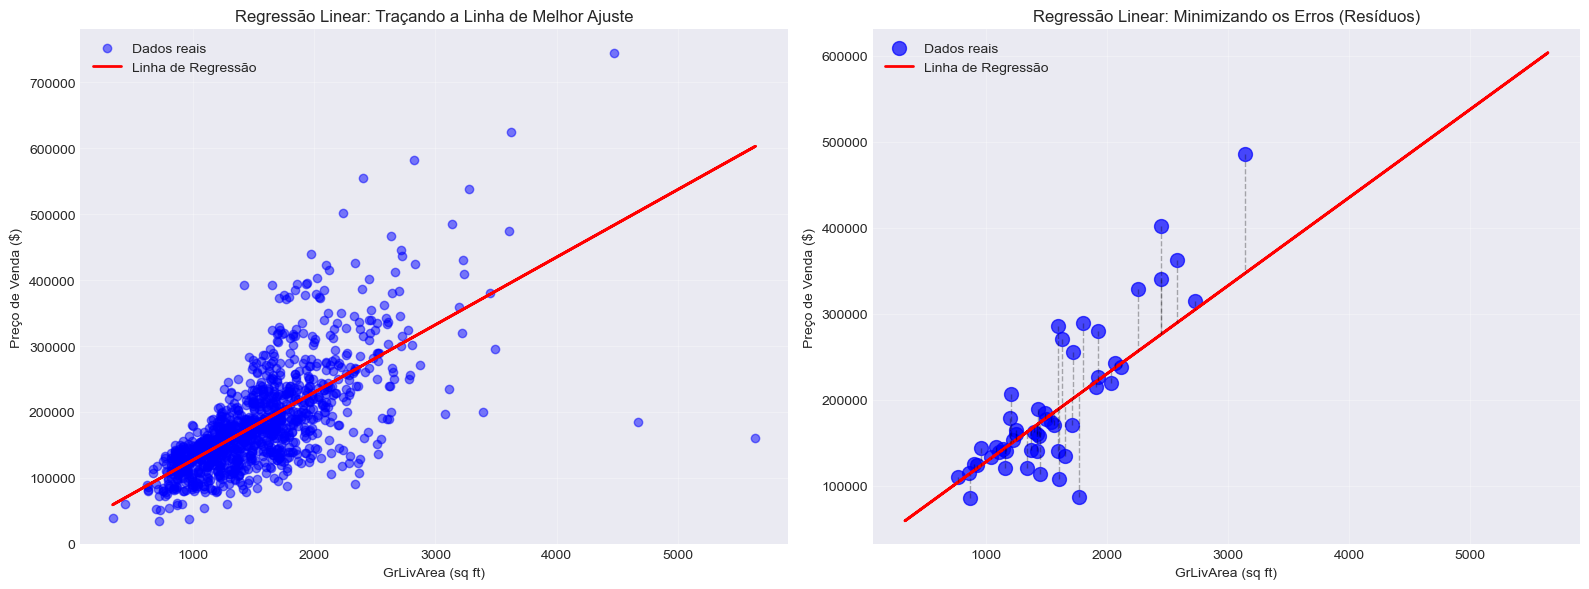

📊 Interpretação:
   • A linha vermelha é a 'linha de melhor ajuste' que o modelo encontrou
   • O modelo tenta minimizar a distância (erros) entre os pontos azuis e a linha
   • Equação: Preço = 24,899.75 + 102.49 × GrLivArea
   • Interpretação: Cada 1 sq ft adicional aumenta ~$102.49 no preço


In [18]:
# Visualização da Regressão Linear
# Vamos usar uma feature importante para criar um exemplo visual simples

# Treinar um modelo simples com apenas uma feature para visualização
feature_for_viz = 'GrLivArea'  # Área de estar - forte correlação com preço

# Preparar dados para visualização (apenas com a feature escolhida)
X_simple = X_train[[feature_for_viz]].values
y_simple = y_train.values

# Treinar modelo simples
lr_simple = LinearRegression()
lr_simple.fit(X_simple, y_simple)

# Fazer previsões
y_pred_simple = lr_simple.predict(X_simple)

# Criar visualização
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Subplot 1: Scatter plot com linha de regressão
axes[0].scatter(X_simple, y_simple, alpha=0.5, label='Dados reais', color='blue')
axes[0].plot(X_simple, y_pred_simple, color='red', linewidth=2, label='Linha de Regressão')
axes[0].set_xlabel(f'{feature_for_viz} (sq ft)')
axes[0].set_ylabel('Preço de Venda ($)')
axes[0].set_title('Regressão Linear: Traçando a Linha de Melhor Ajuste')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Subplot 2: Destacar os erros (resíduos)
# Pegar alguns pontos para visualizar os erros
sample_indices = np.random.choice(len(X_simple), size=50, replace=False)
X_sample = X_simple[sample_indices]
y_sample = y_simple[sample_indices]
y_pred_sample = lr_simple.predict(X_sample)

axes[1].scatter(X_sample, y_sample, alpha=0.7, label='Dados reais', color='blue', s=100)
axes[1].plot(X_simple, y_pred_simple, color='red', linewidth=2, label='Linha de Regressão')

# Desenhar linhas verticais mostrando os erros (resíduos)
for i in range(len(X_sample)):
    axes[1].plot([X_sample[i], X_sample[i]], [y_sample[i], y_pred_sample[i]], 
                'k--', alpha=0.3, linewidth=1)

axes[1].set_xlabel(f'{feature_for_viz} (sq ft)')
axes[1].set_ylabel('Preço de Venda ($)')
axes[1].set_title('Regressão Linear: Minimizando os Erros (Resíduos)')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("📊 Interpretação:")
print(f"   • A linha vermelha é a 'linha de melhor ajuste' que o modelo encontrou")
print(f"   • O modelo tenta minimizar a distância (erros) entre os pontos azuis e a linha")
print(f"   • Equação: Preço = {lr_simple.intercept_:,.2f} + {lr_simple.coef_[0]:,.2f} × {feature_for_viz}")
print(f"   • Interpretação: Cada 1 sq ft adicional aumenta ~${lr_simple.coef_[0]:,.2f} no preço")

## 5.2 Modelo 2: Random Forest

**O que é?** Ensemble de múltiplas árvores de decisão - cada árvore "vota" na previsão final.

**Por que usar?** 
- Captura relações não-lineares complexas
- Robusto a outliers
- Menos sensível a features irrelevantes

**Como funciona?** Treina várias árvores em subconjuntos aleatórios dos dados e features, depois calcula a média das previsões.

In [19]:
# Criar e treinar modelo Random Forest
rf_model = RandomForestRegressor(
    n_estimators=100,      # Número de árvores
    max_depth=15,          # Profundidade máxima das árvores
    random_state=42,
    n_jobs=-1              # Usar todos os processadores
)

rf_model, rf_rmse = evaluate_model(rf_model, X_train, y_train, X_val, y_val, "Random Forest")

print("\n💡 Random Forest geralmente tem melhor performance que modelos lineares em problemas complexos!")


📊 Resultados - Random Forest

Métrica                       Treino       Validação
------------------------------------------------------------
MAE                  $      6,640.50 $     17,633.07
RMSE                 $     11,166.51 $     28,629.00
R² Score                      0.9791          0.8931

💡 Random Forest geralmente tem melhor performance que modelos lineares em problemas complexos!


### 📊 Visualização: Como Funciona o Random Forest?

O Random Forest combina múltiplas árvores de decisão, cada uma treinada em uma amostra diferente dos dados. Vamos visualizar como isso funciona na prática.

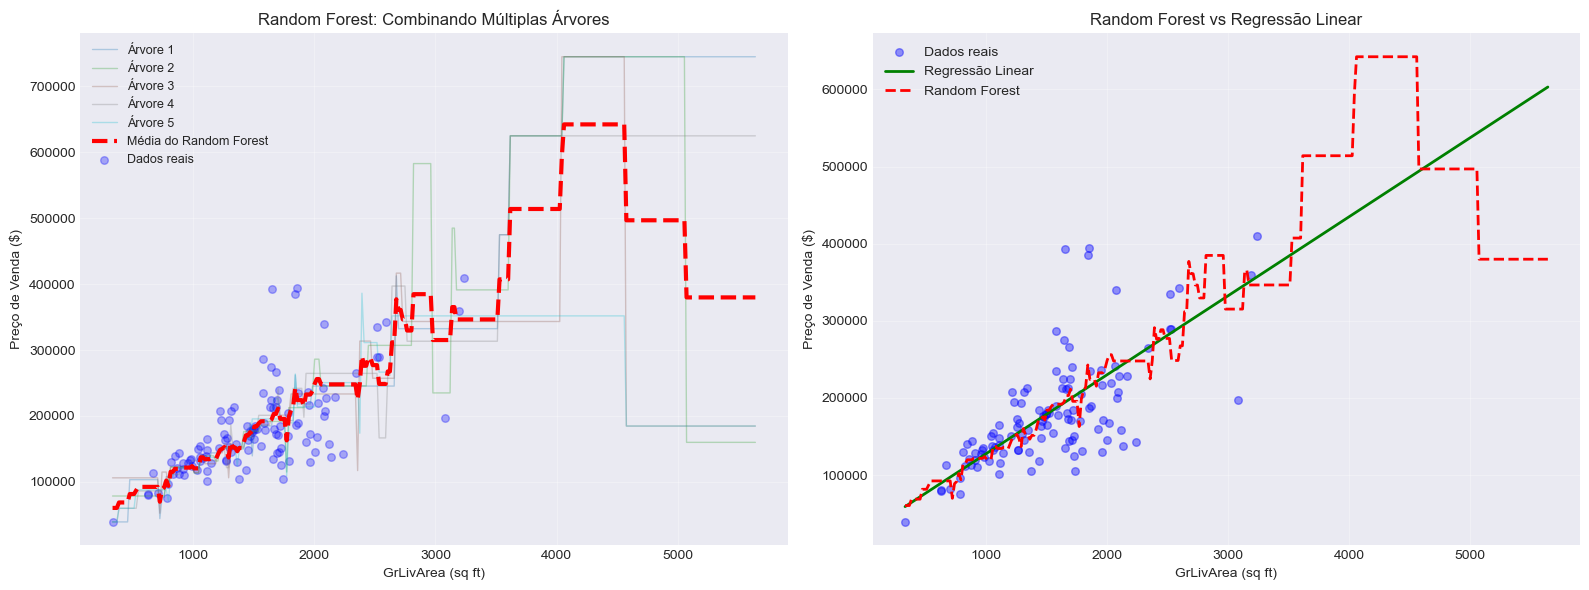

📊 Interpretação:
   • Cada árvore faz previsões ligeiramente diferentes (linhas finas)
   • O Random Forest combina essas previsões calculando a MÉDIA (linha vermelha grossa)
   • Resultado: modelo mais flexível que captura padrões não-lineares
   • Compare: RF se adapta melhor aos dados que a linha reta da regressão linear


In [20]:
# Visualização do Random Forest
# Comparar previsões do RF com Regressão Linear na mesma feature

feature_for_viz = 'GrLivArea'
X_simple = X_train[[feature_for_viz]].values
y_simple = y_train.values

# Treinar Random Forest simples (com apenas uma feature para visualização)
rf_simple = RandomForestRegressor(n_estimators=5, max_depth=5, random_state=42)
rf_simple.fit(X_simple, y_simple)

# Criar pontos para visualização suave
X_range = np.linspace(X_simple.min(), X_simple.max(), 300).reshape(-1, 1)
y_pred_rf = rf_simple.predict(X_range)

# Também pegar predições da regressão linear simples para comparação
y_pred_lr = lr_simple.predict(X_range)

# Visualizar predições de árvores individuais
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Subplot 1: Múltiplas árvores + média
colors = plt.cm.tab10(np.linspace(0, 1, 5))
for idx, tree in enumerate(rf_simple.estimators_):
    y_pred_tree = tree.predict(X_range)
    axes[0].plot(X_range, y_pred_tree, alpha=0.3, linewidth=1, 
                 color=colors[idx], label=f'Árvore {idx+1}')

axes[0].plot(X_range, y_pred_rf, color='red', linewidth=3, 
             label='Média do Random Forest', linestyle='--')
axes[0].scatter(X_simple[::10], y_simple[::10], alpha=0.3, color='blue', s=30, label='Dados reais')
axes[0].set_xlabel(f'{feature_for_viz} (sq ft)')
axes[0].set_ylabel('Preço de Venda ($)')
axes[0].set_title('Random Forest: Combinando Múltiplas Árvores')
axes[0].legend(loc='best', fontsize=9)
axes[0].grid(True, alpha=0.3)

# Subplot 2: Comparação RF vs Linear
axes[1].scatter(X_simple[::10], y_simple[::10], alpha=0.4, color='blue', s=30, label='Dados reais')
axes[1].plot(X_range, y_pred_lr, color='green', linewidth=2, 
             label='Regressão Linear', linestyle='-')
axes[1].plot(X_range, y_pred_rf, color='red', linewidth=2, 
             label='Random Forest', linestyle='--')
axes[1].set_xlabel(f'{feature_for_viz} (sq ft)')
axes[1].set_ylabel('Preço de Venda ($)')
axes[1].set_title('Random Forest vs Regressão Linear')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("📊 Interpretação:")
print(f"   • Cada árvore faz previsões ligeiramente diferentes (linhas finas)")
print(f"   • O Random Forest combina essas previsões calculando a MÉDIA (linha vermelha grossa)")
print(f"   • Resultado: modelo mais flexível que captura padrões não-lineares")
print(f"   • Compare: RF se adapta melhor aos dados que a linha reta da regressão linear")

## 5.3 Modelo 3: Gradient Boosting

**O que é?** Constrói árvores sequencialmente, onde cada nova árvore tenta corrigir os erros da anterior.

**Por que usar?** 
- Geralmente o modelo mais poderoso para dados tabulares
- Muito usado em competições de ML
- Ótimo para capturar padrões complexos

**Como funciona?** Treina árvores iterativamente, focando nos exemplos que foram mal previstos anteriormente.

In [21]:
# Criar e treinar modelo Gradient Boosting
gb_model = GradientBoostingRegressor(
    n_estimators=100,      # Número de árvores
    learning_rate=0.1,     # Taxa de aprendizado
    max_depth=4,           # Profundidade máxima das árvores
    random_state=42
)

gb_model, gb_rmse = evaluate_model(gb_model, X_train, y_train, X_val, y_val, "Gradient Boosting")

print("\n💡 Gradient Boosting é frequentemente o vencedor em competições com dados tabulares!")


📊 Resultados - Gradient Boosting

Métrica                       Treino       Validação
------------------------------------------------------------
MAE                  $      7,252.95 $     16,597.84
RMSE                 $      9,668.10 $     26,097.88
R² Score                      0.9843          0.9112

💡 Gradient Boosting é frequentemente o vencedor em competições com dados tabulares!


### 📊 Visualização: Como Funciona o Gradient Boosting?

O Gradient Boosting constrói árvores sequencialmente, onde cada nova árvore tenta corrigir os erros da anterior. Vamos ver esse processo iterativo!

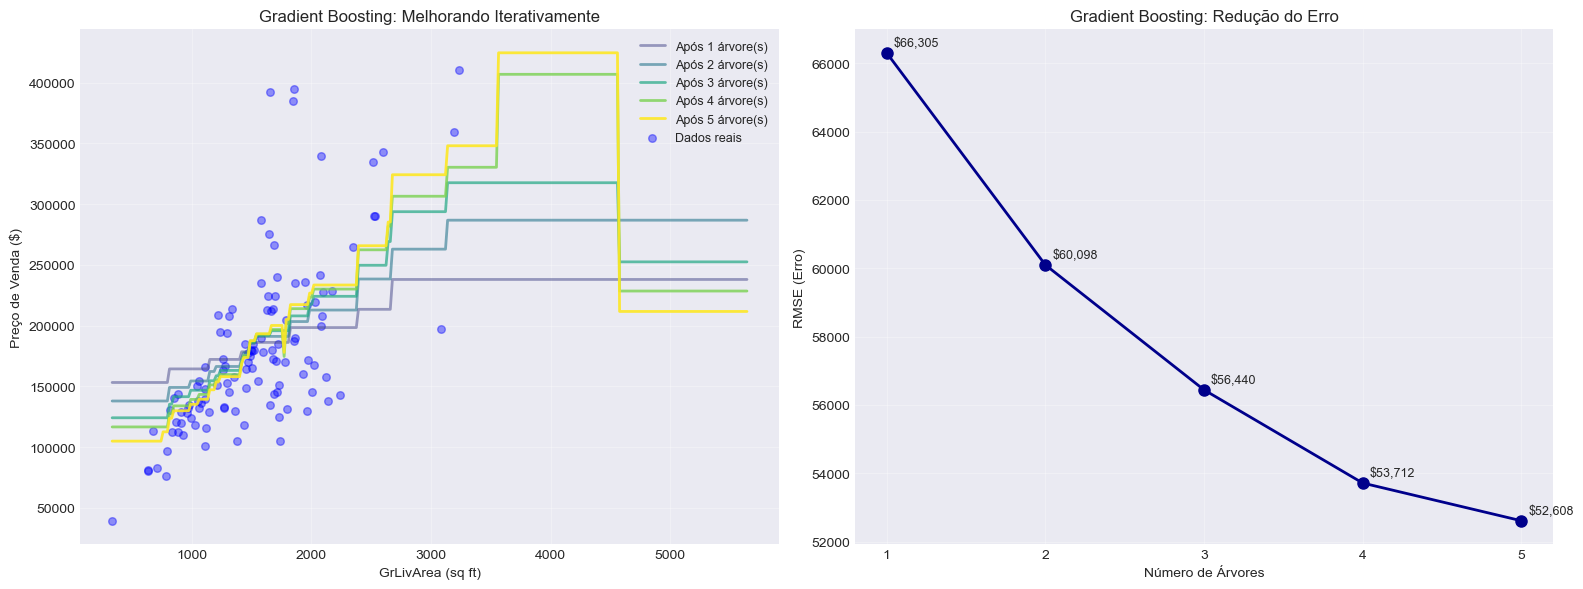

📊 Interpretação:
   • Cada nova árvore foca em corrigir os erros das anteriores
   • As previsões melhoram progressivamente (linhas ficam mais escuras)
   • O erro (RMSE) diminui a cada árvore adicionada
   • Estratégia: aprender com os erros e melhorar iterativamente!
   • Resultado final: modelo muito preciso após combinar todas as árvores


In [22]:
# Visualização do Gradient Boosting
# Mostrar como o modelo melhora iterativamente

feature_for_viz = 'GrLivArea'
X_simple = X_train[[feature_for_viz]].values
y_simple = y_train.values

# Treinar GB com poucas árvores para visualizar o processo
gb_simple = GradientBoostingRegressor(n_estimators=5, learning_rate=0.3, max_depth=3, random_state=42)
gb_simple.fit(X_simple, y_simple)

# Criar pontos para visualização
X_range = np.linspace(X_simple.min(), X_simple.max(), 300).reshape(-1, 1)

# Capturar predições em diferentes estágios (staged_predict)
predictions_staged = []
for i, y_pred_stage in enumerate(gb_simple.staged_predict(X_range)):
    predictions_staged.append(y_pred_stage)

# Visualização
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Subplot 1: Evolução das previsões
colors_gradient = plt.cm.viridis(np.linspace(0.2, 1, len(predictions_staged)))
for i, y_pred in enumerate(predictions_staged):
    axes[0].plot(X_range, y_pred, alpha=0.5 + (i * 0.1), linewidth=2, 
                 color=colors_gradient[i], label=f'Após {i+1} árvore(s)')

axes[0].scatter(X_simple[::10], y_simple[::10], alpha=0.4, color='blue', s=30, label='Dados reais')
axes[0].set_xlabel(f'{feature_for_viz} (sq ft)')
axes[0].set_ylabel('Preço de Venda ($)')
axes[0].set_title('Gradient Boosting: Melhorando Iterativamente')
axes[0].legend(loc='best', fontsize=9)
axes[0].grid(True, alpha=0.3)

# Subplot 2: Redução do erro ao longo das iterações
# Calcular RMSE em cada estágio
rmse_stages = []
for y_pred in predictions_staged:
    # Fazer predições no conjunto de treino para ver a evolução do erro
    y_pred_train = gb_simple.staged_predict(X_simple)
    for stage_pred in y_pred_train:
        rmse = np.sqrt(mean_squared_error(y_simple, stage_pred))
        rmse_stages.append(rmse)
        break  # Pegar apenas o primeiro estágio para este loop

# Recalcular corretamente
rmse_stages = []
for i in range(1, 6):
    gb_temp = GradientBoostingRegressor(n_estimators=i, learning_rate=0.3, max_depth=3, random_state=42)
    gb_temp.fit(X_simple, y_simple)
    y_pred_temp = gb_temp.predict(X_simple)
    rmse = np.sqrt(mean_squared_error(y_simple, y_pred_temp))
    rmse_stages.append(rmse)

axes[1].plot(range(1, 6), rmse_stages, marker='o', linewidth=2, markersize=8, color='darkblue')
axes[1].set_xlabel('Número de Árvores')
axes[1].set_ylabel('RMSE (Erro)')
axes[1].set_title('Gradient Boosting: Redução do Erro')
axes[1].grid(True, alpha=0.3)
axes[1].set_xticks(range(1, 6))

# Adicionar anotações
for i, rmse in enumerate(rmse_stages):
    axes[1].annotate(f'${rmse:,.0f}', xy=(i+1, rmse), xytext=(5, 5), 
                     textcoords='offset points', fontsize=9)

plt.tight_layout()
plt.show()

print("📊 Interpretação:")
print(f"   • Cada nova árvore foca em corrigir os erros das anteriores")
print(f"   • As previsões melhoram progressivamente (linhas ficam mais escuras)")
print(f"   • O erro (RMSE) diminui a cada árvore adicionada")
print(f"   • Estratégia: aprender com os erros e melhorar iterativamente!")
print(f"   • Resultado final: modelo muito preciso após combinar todas as árvores")

## 5.4 Comparação dos Modelos

Vamos visualizar e comparar a performance de todos os modelos testados.

📊 RANKING DOS MODELOS (menor RMSE é melhor):

           Modelo  RMSE (Validação)
Gradient Boosting      26097.879967
    Random Forest      28629.003080
Linear Regression      52171.879612


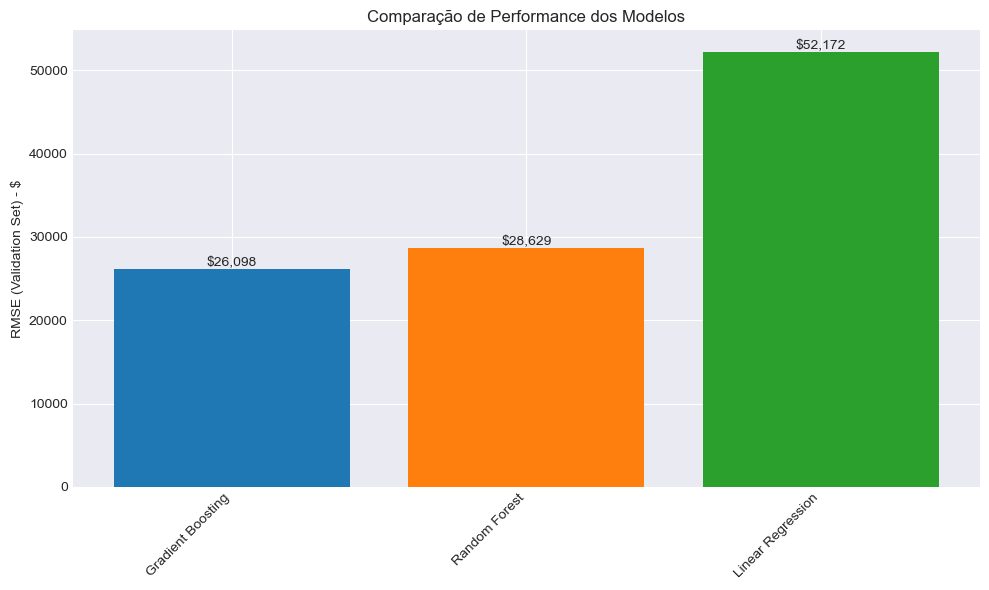


🏆 MELHOR MODELO: Gradient Boosting com RMSE de $26,097.88

💡 Este é o modelo que usaremos para fazer as previsões finais!


In [23]:
# Criar DataFrame com resultados
results = pd.DataFrame({
    'Modelo': ['Linear Regression', 'Random Forest', 'Gradient Boosting'],
    'RMSE (Validação)': [lr_rmse, rf_rmse, gb_rmse]
}).sort_values('RMSE (Validação)')

print("📊 RANKING DOS MODELOS (menor RMSE é melhor):\n")
print(results.to_string(index=False))

# Visualização
plt.figure(figsize=(10, 6))
bars = plt.bar(results['Modelo'], results['RMSE (Validação)'], color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
plt.ylabel('RMSE (Validation Set) - $')
plt.title('Comparação de Performance dos Modelos')
plt.xticks(rotation=45, ha='right')

# Adicionar valores nas barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
            f'${height:,.0f}',
            ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Identificar o melhor modelo
best_model_name = results.iloc[0]['Modelo']
best_rmse = results.iloc[0]['RMSE (Validação)']
print(f"\n🏆 MELHOR MODELO: {best_model_name} com RMSE de ${best_rmse:,.2f}")
print(f"\n💡 Este é o modelo que usaremos para fazer as previsões finais!")

## 5.5 Análise de Importância das Features (Gradient Boosting)

Vamos ver quais variáveis são mais importantes para o modelo Gradient Boosting. Isso nos ajuda a entender o que realmente influencia o preço das casas.

🔝 Top 15 Features mais importantes:

     Feature  Importance
 OverallQual    0.532550
   GrLivArea    0.144938
 TotalBsmtSF    0.039343
  GarageCars    0.037301
  BsmtFinSF1    0.033633
    2ndFlrSF    0.026903
    1stFlrSF    0.023149
   YearBuilt    0.020200
     LotArea    0.017591
  GarageArea    0.010884
YearRemodAdd    0.009148
  Fireplaces    0.008627
    FullBath    0.008580
 OverallCond    0.007512
 GarageYrBlt    0.006437


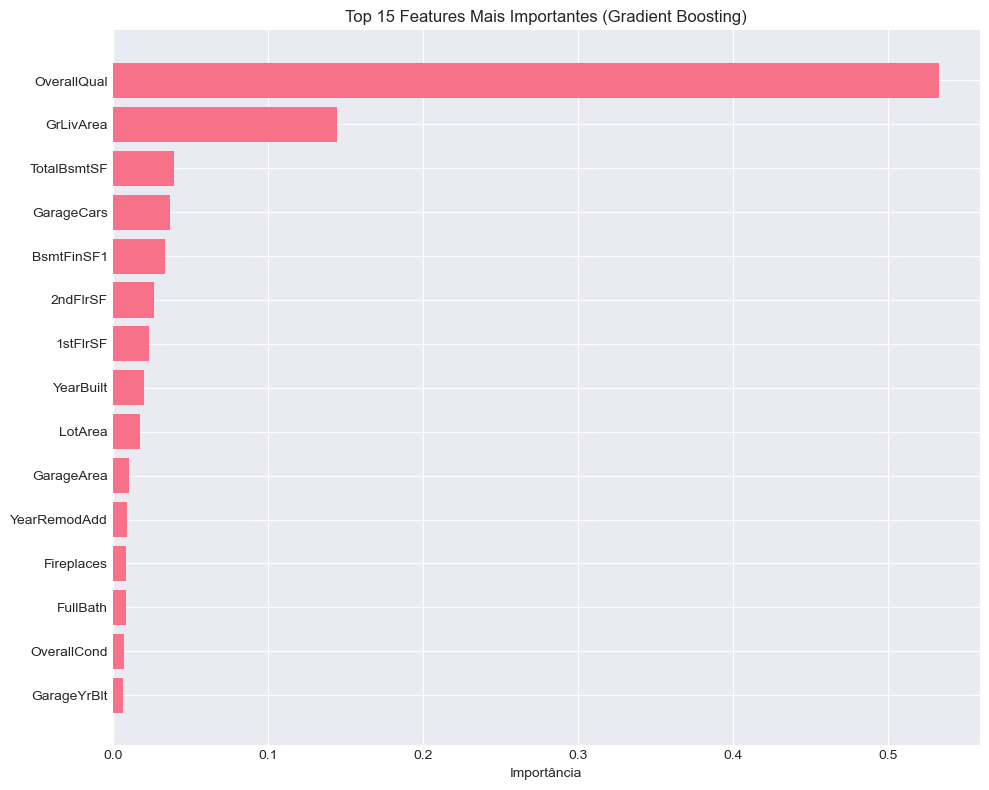

In [24]:
# Obter importâncias das features do Gradient Boosting
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': gb_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("🔝 Top 15 Features mais importantes:\n")
print(feature_importance.head(15).to_string(index=False))

# Visualização
plt.figure(figsize=(10, 8))
top_features = feature_importance.head(15)
plt.barh(range(len(top_features)), top_features['Importance'])
plt.yticks(range(len(top_features)), top_features['Feature'])
plt.xlabel('Importância')
plt.title('Top 15 Features Mais Importantes (Gradient Boosting)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


---
# 📤 PARTE 4: GERANDO PREVISÕES PARA SUBMISSÃO

Agora vamos usar nosso melhor modelo para fazer previsões no conjunto de teste e criar o arquivo de submissão para o Kaggle!

## 6.1 Treinar Modelo Final em Todos os Dados

Para melhor performance, vamos retreinar o melhor modelo usando TODOS os dados de treino disponíveis (treino + validação).

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.15],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

gb_base = GradientBoostingRegressor(random_state=42)

grid_search = GridSearchCV(
    estimator=gb_base,
    param_grid=param_grid,
    cv=5, 
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_combined, y)

print(f"\nMelhores parâmetros encontrados:")
for param, value in grid_search.best_params_.items():
    print(f"   {param}: {value}")

print(f"\nMelhor RMSE (validação cruzada): ${np.sqrt(-grid_search.best_score_):,.2f}")

final_model = grid_search.best_estimator_

print("\n✅ Modelo final treinado com sucesso!")
print(f"   Dados usados: {X_combined.shape[0]} casas")
print(f"   Features: {X_combined.shape[1]} variáveis ({X_numeric_filled.shape[1]} numéricas + {X_categorical_encoded.shape[1]} categóricas)")

Fitting 5 folds for each of 108 candidates, totalling 540 fits


## 6.2 Fazer Previsões no Conjunto de Teste

Vamos usar nosso modelo treinado para prever os preços das casas no conjunto de teste.

In [ ]:
# Fazer previsões no conjunto de teste
print("🔮 Gerando previsões para o conjunto de teste...")

# IMPORTANTE: Usar X_test_combined que inclui features numéricas E categóricas
test_predictions = final_model.predict(X_test_combined)


🔮 Gerando previsões para o conjunto de teste...


## 6.3 Criar Arquivo de Submissão

Vamos criar o arquivo CSV no formato exigido pelo Kaggle para submissão.

In [ ]:
# Criar DataFrame com as previsões
submission = pd.DataFrame({
    'Id': test_ids,
    'SalePrice': test_predictions
})

# Salvar arquivo de submissão
submission.to_csv('data/submission3.csv', index=False)

print("✅ Arquivo de submissão criado com sucesso!")
print(f"   Arquivo: data/submission.csv")
print(f"   Formato: {submission.shape[0]} linhas, {submission.shape[1]} colunas")
print("\n📄 Primeiras linhas do arquivo de submissão:\n")
print(submission.head(10))



✅ Arquivo de submissão criado com sucesso!
   Arquivo: data/submission.csv
   Formato: 1459 linhas, 2 colunas

📄 Primeiras linhas do arquivo de submissão:

     Id      SalePrice
0  1461  120341.384782
1  1462  165754.058144
2  1463  184976.364978
3  1464  186810.252345
4  1465  183196.706834
5  1466  177213.714959
6  1467  171782.247055
7  1468  166056.097580
8  1469  196723.624039
9  1470  128085.141802


---
# 🎓 DICAS PARA AUMENTAR A PONTUAÇÃO
- analise se todas as variaveis categoricas realmente são categoricas e se as numericas realmente são numericas
- utilize modelos ainda melhores, teste tecnicas como ensenble e tuning (Grid Search e Random Search)
- não tratem somente valores nulos, mas sim 0 em variaveis numericas ( faz sentido uma casa ter 0 metros quadarados?), tratem outliers, e diminuam as opções de categorias nas variaveis numericas para simplificar o modelo.
- melhore os tratamentos dos dados e explore a criação de features, sejam criativos! 💡 



#### OBS: a pontuação no kaggle foi de 14990.96628. Ou seja, o objetivo de vocês é fazer uma pontuação **menor** que isso.

